In [65]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats


In [144]:
filename = '../../outputs/correlation-05-18-2021_11-42-58.csv'
df = pd.read_csv(filename)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs

In [177]:
over_90 = df[df.train_acc > 0]
print(over_90.shape)
print(over_90.columns)

(2434, 38)
Index(['model_num', 'test_acc', 'test_loss', 'train_acc', 'train_loss',
       'quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7'],
      dtype='object')


In [186]:
cols = ['quality_L1', 'quality_L2', 'quality_prod', 'KG_L1', 'MC_L1', 'MC_L3',
       'ER_L1', 'mquality_L1', 'mquality_prod', 'mquality-wL1', 'mquality-wp',
       'qlayer0mode3', 'qlayer0mode4', 'qlayer-1mode3', 'qlayer-1mode4', 'KG0',
       'KG-1', 'MC0', 'MC-1', 'qnL1', 'qnL3', 'qnL4', 'qnL5', 'qnrL1', 'qnrL3',
       'qnrL4', 'qnrL5', 'qnprL1', 'qnprL3', 'qnprL4', 'qnprL5', 'qnrL6',
       'qnrL7']
test_acc_vec = over_90['test_acc']
train_acc_vec = over_90['train_acc']
gap = train_acc_vec - test_acc_vec
results = {}
results2 = {}

for x in cols:
    col = over_90[x]
    vec = col.to_numpy()
    results[x + "_test"] = stats.pearsonr(-vec, test_acc_vec)[0]
    results[x + "_train"] = stats.pearsonr(-vec, train_acc_vec)[0]
    results[x + "_gap"] = stats.pearsonr(-vec, gap)[0]

    results2[x + "_test"] = stats.spearmanr(-vec, test_acc_vec)[0]
    results2[x + "_train"] = stats.spearmanr(-vec, train_acc_vec)[0]
    results2[x + "_gap"] = stats.spearmanr(-vec, gap)[0]
    

In [187]:
sorted_values = sorted(results.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in results.keys():
        if results[k] == i:
            sorted_dict[k] = results[k]
            break

sorted_values = sorted(results2.values()) # Sort the values
sorted_dict2 = {}
for i in sorted_values:
    for k in results2.keys():
        if results2[k] == i:
            sorted_dict2[k] = results2[k]
            break

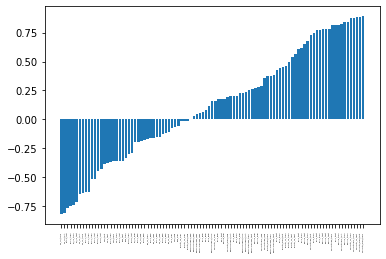

In [188]:
SMALL_SIZE = 2
#matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rc('xtick', labelsize=SMALL_SIZE)

plt.bar(range(len(sorted_dict2)), list(sorted_dict2.values()), align='center');
plt.xticks(range(len(sorted_dict2)), list(sorted_dict2.keys()),rotation='vertical');

In [194]:
import operator
print(max(results, key=results.get), results[max(results, key=results.get)])
print(max(results2, key=results2.get), results2[max(results2, key=results2.get)])
print("\nOther Corr:\n")
print(min(results, key=results.get), results[min(results, key=results.get)])
print(min(results2, key=results2.get), results2[min(results2, key=results2.get)])

mquality_prod_train 0.9031562395140799
mquality_prod_train 0.8905613873371244

Other Corr:

MC_L3_test -0.7812898024316187
MC_L3_train -0.8185744581172973


Pearson:  0.9031562395140799
Spearman: 0.8905613873371244


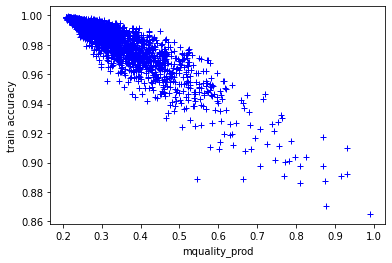

In [195]:
accuracy = "train" #"train", "test"
x_axis = 'mquality_prod'

matplotlib.rc('xtick', labelsize=10)
plt.plot(over_90[x_axis] , over_90[accuracy+'_acc'], '+', color='blue')#over_90[accuracy+'_acc']
plt.xlabel(x_axis)
plt.ylabel(accuracy + " accuracy")
#plt.ylim([0,1.1])
print("Pearson: ",results[x_axis+'_'+accuracy])
print("Spearman:", results2[x_axis+'_'+accuracy])
plt.show()

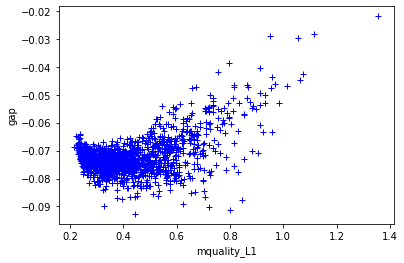

In [116]:
plt.plot(over_90['mquality_L1'],gap, '+', color='blue')
plt.xlabel('mquality_L1')
plt.ylabel('gap')
#plt.ylim([0,1.1])
plt.show()

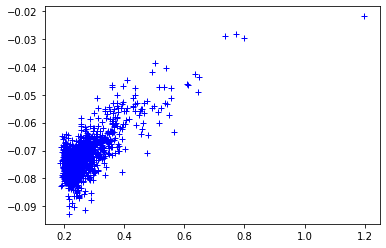

In [52]:
filename = '../../outputs/newersss.csv'
d = pd.read_csv(filename)
plt.plot(d['mquality-wp'],d['gap'], '+', color='blue')